In [1]:
# Locate to working directory
%cd '/home/abaric/retriever-sentiment'

/home/abaric/retriever-sentiment


In [2]:
import pandas as pd

# Sample data for annotation

### Import full retriever dump

In [7]:
# Import full retriever dump
retriever_dump = pd.read_csv('data/retriever/full_dump_20220825.csv')

In [8]:
retriever_dump

,id,url,portal,date_published,title,body
0,5079661,https://2012-transformacijasvijesti.com/zdravl...,2012-transformacijasvijesti.com,2018-02-06 00:00:00,"Kurkuma čudo prirode: djeluje protuupalno, lij...","Kurkuma je biljka iz porodice đumbira, Zingibe..."
1,5181194,https://2012-transformacijasvijesti.com/metafi...,2012-transformacijasvijesti.com,2011-02-21 00:00:00,Zen um: ne-um,Zen um je “prirodno” stanje našeg bića: Bez se...
2,5167014,https://2012-transformacijasvijesti.com/mikroc...,2012-transformacijasvijesti.com,2011-02-19 00:00:00,Čipiranje ljudi,Primjetio sam da mnogi nisu previse upoznati s...
3,5167153,https://2012-transformacijasvijesti.com/manipu...,2012-transformacijasvijesti.com,2011-10-11 00:00:00,Kontrola MEDIJA: Svi smo mi 12-godišnja Marina...,Pojedinac je hendikepiran kad se susreće s teo...
4,5102018,https://2012-transformacijasvijesti.com/korona...,2012-transformacijasvijesti.com,2020-05-23 00:00:00,"INTERVJU Krešimir Mišak o koronavirusu, Bill G...",2. dio\nOPĆA DEKLARACIJA O LJUDSKIM PRAVIMA – ...
...,...,...,...,...,...,...
9893406,7314536,https://vecernji.hr/vijesti/biraci-s-covid-19-...,vecernji.hr,2020-07-04 00:00:00,Birači s COVID-19 mogu glasati: Izbori u nikad...,Kako se sutrašnji izbori odvijaju u nikada do ...
9893407,7699651,https://vecernji.hr/vijesti/uzivo-pratite-reak...,vecernji.hr,2020-07-05 00:00:00,Vučemilović oštro o anketnim agencijama: 'Ovo ...,Danas od 7 sati glasovalo se na više od 6.500 ...
9893408,6544594,https://vecernji.hr/vijesti/hns-skoro-je-pjeva...,vecernji.hr,2020-06-20 00:00:00,"HNS: 'Škoro je pjevač opasnih namjera, u total...","Maske su sada potpuno pale, Škoro je pjevač op..."
9893409,5869030,https://vecernji.hr/sport/zverev-uvjerljivo-do...,vecernji.hr,2021-10-30 00:00:00,Zverev uvjerljivo do finala,Za 24-godišnjeg Nijemca ovo će biti peti final...


#### Get portal counts

In [ ]:
retriever_dump['portal'].value_counts()

### Sample retriever dump

Generate sample

In [ ]:
retriever_sample = retriever_dump.groupby(['portal', 'date_published'], group_keys=False).apply(lambda x: x.sample(frac=0.011))

In [16]:
retriever_sample = retriever_dump.sample(n=100000)

Load sample (if exists)

In [3]:
retriever_sample = pd.read_csv('data/retriever/sample_20220825.csv')

#### Get portal counts

In [20]:
retriever_sample['portal'].value_counts() / 100000

tportal.hr                           0.27407
index.hr                             0.11091
vecernji.hr                          0.10860
jutarnji.hr                          0.08530
dnevnik.hr                           0.05953
net.hr                               0.05449
glas-slavonije.hr                    0.04659
direktno.hr                          0.04491
slobodnadalmacija.hr                 0.04059
24sata.hr                            0.03915
hr.n1info.com                        0.02874
rtl.hr                               0.02559
narod.hr                             0.01744
hrt.hr                               0.01448
dnevno.hr                            0.00997
novilist.hr                          0.00830
h-alter.org                          0.00727
telegram.hr                          0.00484
face.ba                              0.00360
priznajem.hr                         0.00236
teleskop.hr                          0.00137
tris.com.hr                          0.00133
geopolitik

In [21]:
retriever_dump.portal.value_counts() / retriever_dump.shape[0]

tportal.hr                           0.274119
index.hr                             0.112078
vecernji.hr                          0.108461
jutarnji.hr                          0.083919
dnevnik.hr                           0.060129
net.hr                               0.054035
glas-slavonije.hr                    0.046685
direktno.hr                          0.044236
slobodnadalmacija.hr                 0.041672
24sata.hr                            0.039729
hr.n1info.com                        0.028138
rtl.hr                               0.024898
narod.hr                             0.017979
hrt.hr                               0.014154
dnevno.hr                            0.010181
novilist.hr                          0.008445
h-alter.org                          0.006935
telegram.hr                          0.005009
face.ba                              0.003475
priznajem.hr                         0.002164
geopolitika.news                     0.001466
teleskop.hr                       

<AxesSubplot:xlabel='date_published'>

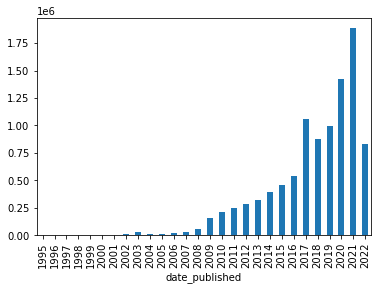

In [22]:
retriever_dump['date_published'] = retriever_dump['date_published'].astype("datetime64")
retriever_dump["date_published"].groupby(retriever_dump["date_published"].dt.year).count().plot(kind="bar")

<AxesSubplot:xlabel='date_published'>

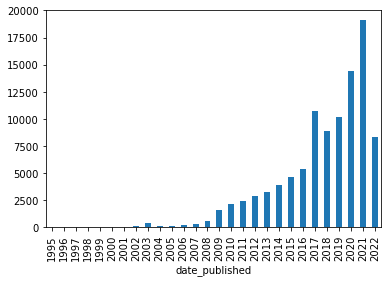

In [23]:
retriever_sample['date_published'] = retriever_sample['date_published'].astype("datetime64")
retriever_sample["date_published"].groupby(retriever_sample["date_published"].dt.year).count().plot(kind="bar")

Save CSV

In [ ]:
retriever_sample.to_csv('data/sample_20220825.csv', index=False)